In [5]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [225]:
def normal_plot(mu, sigma, nstds=4, npts=500,
                auc=None, auc_color='grey', auc_alpha=0.75, 
                auc_linestyle='dashed', auc_linewidth=1, auc_linecolor='black',
                subplot=(1,1,1), **kw):
    ax = plt.subplot(*subplot)
    dist = stats.norm(loc=mu, scale=sigma)
    xmin, xmax = mu-nstds*sigma, mu+nstds*sigma
    x = np.linspace(xmin,xmax,npts)
    y = dist.pdf(x)
    ax.plot(x,y, **kw)
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    for side in ["top","right","left"]:
        ax.spines[side].set_visible(False)
    ax.set_ylim(0,max(y)*1.1)
    if auc is not None:
        aucmin, aucmax = xmin, xmax
        if auc[0] is not None:
            aucmin = auc[0]
        if auc[1] is not None:
            aucmax = auc[1]
        xauc = np.linspace(aucmin, aucmax, npts)
        yauc = dist.pdf(xauc)
        ax.fill_between(xauc,np.zeros_like(yauc),yauc,color=auc_color,alpha=auc_alpha)
        for pt in auc[:2]:
            if pt is None:  # only draw border w/specified line
                continue
            ax.vlines(pt, 0, dist.pdf(pt), linestyle=auc_linestyle, 
                      linewidth=auc_linewidth, color=auc_linecolor)
    return ax, dist

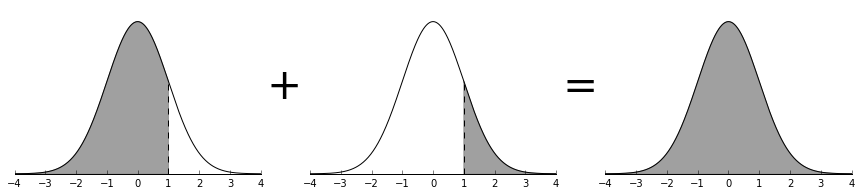

In [304]:
ax1, dist1 = normal_plot(0,1,color='k', auc=(None,1), subplot=(1,3,1))
ax2, dist2 = normal_plot(0,1,color='k', auc=(1,None),  subplot=(1,3,2))
ax3, dist3 = normal_plot(0,1,color='k', auc=(None,None), subplot=(1,3,3))
ax1.text(1.025, 0.45, "+", transform=ax1.transAxes, fontsize=42)
ax2.text(1.025, 0.45, "=", transform=ax2.transAxes, fontsize=42)
plt.gcf().set_size_inches(15,3)

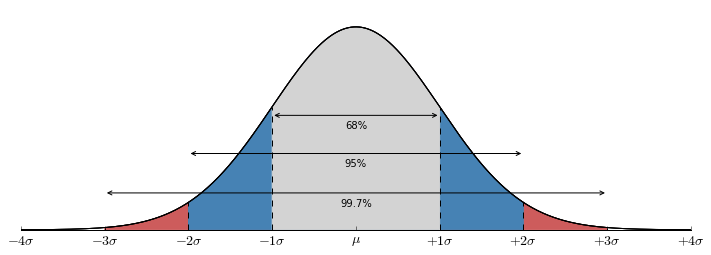

In [291]:
normal_plot(0,1,color='k',auc=(-3,3),auc_color='indianred',auc_alpha=1)
normal_plot(0,1,color='k',auc=(-2,2),auc_color='steelblue',auc_alpha=1)
normal_plot(0,1,color='k',auc=(-1,1),auc_color='lightgray',auc_alpha=1)

plt.annotate('', 
             xy=(-1,0.225), xycoords='data', 
             xytext=(1,0.225), textcoords='data',
             arrowprops={'arrowstyle': '<->'})
plt.annotate('68%', 
             xy=(0, 0.225), xycoords='data',
             xytext=(0,-10), textcoords='offset points',
             verticalalignment='center',horizontalalignment='center')


plt.annotate('', 
             xy=(-2,0.15), xycoords='data', 
             xytext=(2,0.15), textcoords='data',
             arrowprops={'arrowstyle': '<->'})
plt.annotate('95%', 
             xy=(0, 0.15), xycoords='data',
             xytext=(0,-10), textcoords='offset points',
             verticalalignment='center',horizontalalignment='center')

plt.annotate('', 
             xy=(-3,0.0725), xycoords='data', 
             xytext=(3,0.0725), textcoords='data',
             arrowprops=dict(arrowstyle='<->'))

plt.annotate('99.7%', 
             xy=(0, 0.0725), xycoords='data',
             xytext=(0,-10), textcoords='offset points',
             verticalalignment='center',horizontalalignment='center')

xtickleft, xtickright = [-4,-3,-2,-1], [1,2,3,4]
xlableft = ["$%d\sigma$" % i for i in xtickleft]
xlabright = ["$+%d\sigma$" % i for i in xtickright]
plt.xticks(xtickleft + [0] + xtickright, xlableft + ["$\mu$"] + xlabright, fontsize=14)
plt.gcf().set_size_inches(12,4)
pass

In [283]:
range(-4,4)

range(-4, 4)

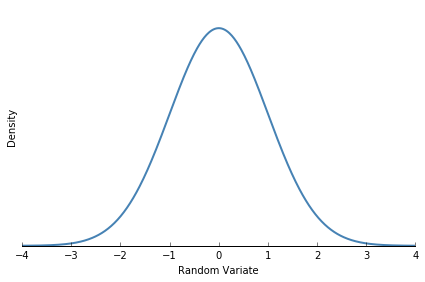

In [179]:
normal_plot(0,1,color='steelblue',linewidth=2)    
plt.ylabel("Density")
plt.xlabel("Random Variate")
plt.tight_layout()
plt.savefig("fig-generic-normal.png")

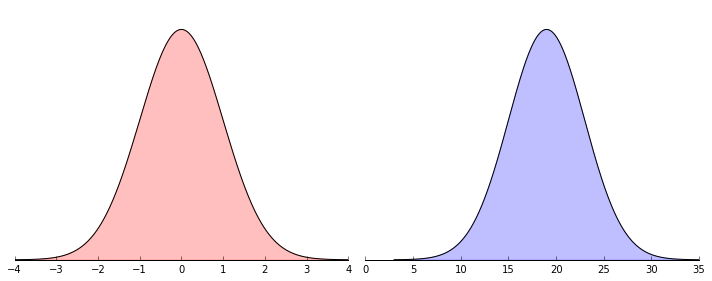

In [107]:
dist1 = stats.norm(loc=0,scale=1)
dist2 = stats.norm(loc=19,scale=4)

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(10,4)

x1 = np.linspace(-4,4,1000)
x2 = np.linspace(3,35,1000)
y1 = dist1.pdf(x1)
y2 = dist2.pdf(x2)

ax1.plot(x1, y1, color='k')
ax1.set_ylim(0,max(y1)*1.1)
ax1.set_yticks([])
ax1.xaxis.set_ticks_position('bottom')
for side in ["top","right","left"]:
    ax1.spines[side].set_visible(False)
#ax1.text(2,max(y1)*0.5,"$N(0,1)$",fontsize=18)    
ax1.fill_between(x1,np.zeros_like(y1),y1,color='red',alpha=.25)

ax2.plot(x2, y2, color='k')
ax2.set_ylim(0,max(y2)*1.1)
ax2.set_yticks([])
ax2.xaxis.set_ticks_position('bottom')
for side in ["top","right","left"]:
    ax2.spines[side].set_visible(False)
#ax2.text(27,max(y2)*0.5,"$N(19,4)$",fontsize=18)    
ax2.fill_between(x2,np.zeros_like(y2),y2,color='blue',alpha=.25)

    
fig.tight_layout()
fig.savefig("fig-twonormals.png")
pass


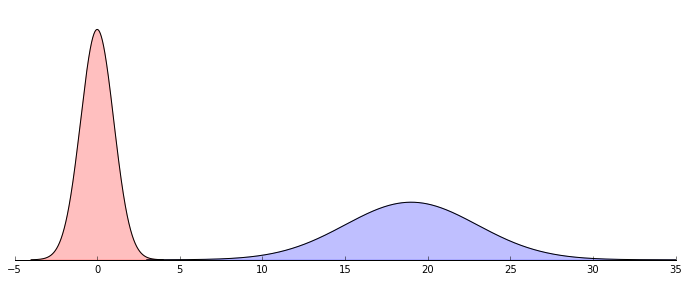

In [106]:
plt.plot(x1,y1,'k')
plt.plot(x2,y2,'k')
plt.ylim(0, max(np.max(y1),np.max(y2))*1.1)
plt.fill_between(x1,np.zeros_like(y1),y1,color='red',alpha=.25)
plt.fill_between(x2,np.zeros_like(y2),y2,color='blue',alpha=.25)

for side in ["top","right","left"]:
    plt.gca().spines[side].set_visible(False)
plt.yticks([])
plt.gca().xaxis.set_ticks_position('bottom')

fig = plt.gcf()
fig.tight_layout()
fig.set_size_inches(10,4)
fig.savefig("fig-twonormals-oneaxis.png")
pass

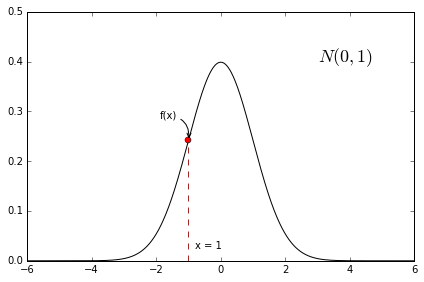

In [6]:
x = np.linspace(-6,6,1000)
y = stats.norm.pdf(x)
plt.plot(x,y, color='k')
plt.ylim(0,0.5)
xpt = -1
ypt = stats.norm.pdf(xpt)
plt.plot(xpt,ypt,'ro')
plt.vlines(xpt, 0, ypt, linestyle='dashed', color='red')
plt.text(3,0.4,"$N(0,1)$",fontsize=18)
plt.annotate("f(x)", xy=(xpt,ypt),
             xytext=(-20,20),
             textcoords='offset points', # offset text in pixels
             horizontalalignment="center",
             verticalalignment="bottom",
             arrowprops=dict(arrowstyle="->",color='black',
                             connectionstyle='arc3,rad=-0.5',
                             linewidth=1))
plt.annotate("x = 1",xy=(xpt,0),
            xytext=(20,20), textcoords='offset points',
            horizontalalignment="center",
            verticalalignment="top")
plt.tight_layout()
plt.savefig("fig-probdensfxn.pdf")


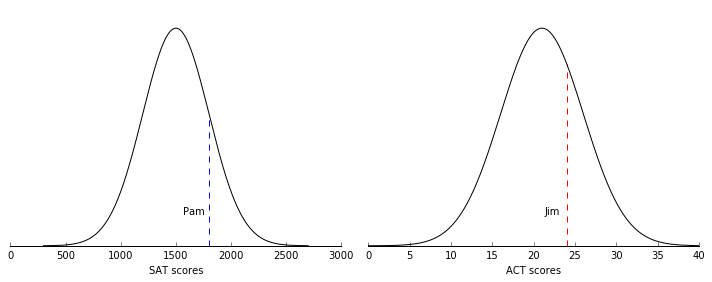

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(10,4)

SAT = stats.norm(loc=1500,scale=300)
xsat = np.linspace(300,2700,1000)
ysat = SAT.pdf(xsat)
ax1.plot(xsat, ysat, color='k')
ax1.set_ylim(0,max(ysat)*1.1)
ax1.set_yticks([])
ax1.xaxis.set_ticks_position('bottom')
for side in ["top","right","left"]:
    ax1.spines[side].set_visible(False)
ax1.vlines(1800,0,SAT.pdf(1800),linestyle='dashed',color='blue')
ax1.annotate("Pam",xy=(1800,0),
            xytext=(-15,40), textcoords='offset points',
            horizontalalignment="center",
            verticalalignment="top")
ax1.set_xlabel("SAT scores")

ACT = stats.norm(loc=21,scale=5)
xact = np.linspace(0,40,1000)
yact = ACT.pdf(xact)
ax2.plot(xact, yact, color='k')
ax2.set_ylim(0,max(yact)*1.1)
ax2.set_yticks([])
ax2.xaxis.set_ticks_position('bottom')
for side in ["top","right","left"]:
    ax2.spines[side].set_visible(False)
ax2.vlines(24,0,ACT.pdf(24),linestyle='dashed',color='red')
ax2.annotate("Jim",xy=(24,0),
            xytext=(-15,40), textcoords='offset points',
            horizontalalignment="center",
            verticalalignment="top")
ax2.set_xlabel("ACT scores")

fig.tight_layout()
fig.savefig("fig-SATvACT.png")
pass

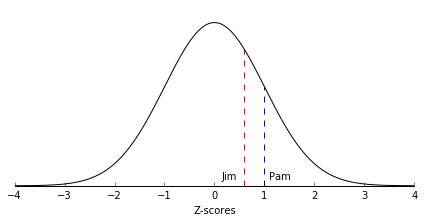

In [303]:
normal_plot(0,1,color='k')
plt.vlines(1,0,stdnorm.pdf(1),linestyle='dashed',color='blue')
plt.annotate("Pam",xy=(1,0),
            xytext=(15,15), textcoords='offset points',
            horizontalalignment="center",
            verticalalignment="top")

plt.vlines(0.6,0,stdnorm.pdf(0.6),linestyle='dashed',color='red')
plt.annotate("Jim",xy=(0.6,0),
            xytext=(-15,15), textcoords='offset points',
            horizontalalignment="center",
            verticalalignment="top")
plt.xlabel("Z-scores")
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(6,3)
plt.savefig("fig-SATvACT-zscores.png")
pass

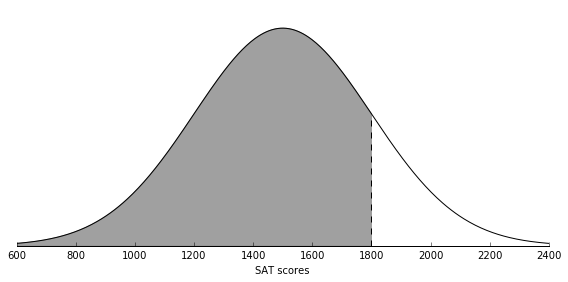

In [302]:
fig = plt.figure()
ax,dist = normal_plot(1500,300,auc=(None,1800),color='k')
fig.set_size_inches(8,4)
ax.set_xlabel("SAT scores")
ax.set_xlim(600,2400)
fig.tight_layout()
fig.savefig("fig-percentile.png")

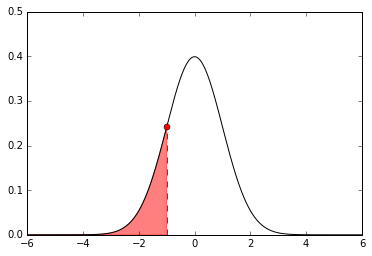

In [37]:
x = np.linspace(-6,6,1000)
y = stats.norm.pdf(x)
plt.plot(x,y, color='k')
plt.ylim(0,0.5)
xpt = -1
ypt = stats.norm.pdf(xpt)
plt.plot(xpt,ypt,'ro')
plt.vlines(xpt, 0, ypt, linestyle='dashed', color='red')
xto = np.linspace(-6,xpt,100)
yto = stats.norm.pdf(xto)
yzero = np.zeros_like(xto)
plt.fill_between(xto,yzero,yto,color='red',alpha=.5)

In [42]:
stats.norm.ppf(0.03,loc=98.2, scale=0.73)

96.827020666049592

In [44]:
stats.norm.isf(0.1,loc=98.2, scale=0.73)

99.135532642847565

In [293]:
data = pd.read_csv("http://roybatty.org/butterfat.csv")

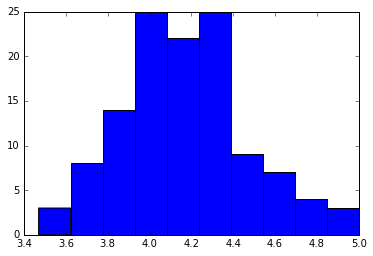

In [294]:
plt.hist(data.butterfat)
pass

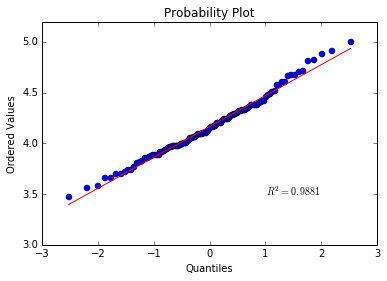

In [295]:
stats.probplot(data.butterfat,plot=plt)
plt.ylim(3,5.2)
pass

In [296]:
meanbf = data.butterfat.mean()
stdbf = data.butterfat.std()
meanbf, stdbf

(4.166083333333336, 0.3023807378856294)

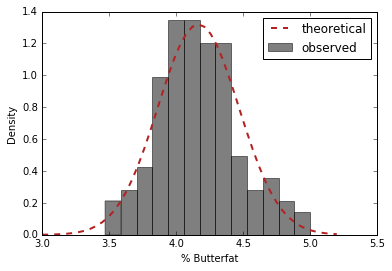

In [299]:
plt.hist(data.butterfat,bins=13,color='black',alpha=0.5,normed=True,label="observed")
x = np.linspace(3,5.2)
y = stats.norm.pdf(x,loc=meanbf, scale=stdbf)
plt.plot(x,y,linestyle='dashed',color='firebrick', linewidth=2,label="theoretical")
plt.xlabel("% Butterfat")
plt.ylabel("Density")
plt.legend()
pass

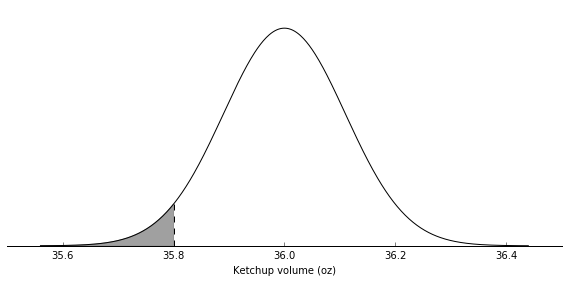

In [301]:
ax,dist = normal_plot(36,0.11,auc=(None,35.8),color='k')
ax.set_xlabel('Ketchup volume (oz)')
fig = plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('fig-ketchup-low.png')